## Crop and Fertilizer Recommendation using Decision Tree Classifier

### Import Libraries

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

### Importing Data

In [40]:
data = pd.read_csv("/content/faulty_crop_dataset.csv")
data.head()

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link
0,Kolhapur,Black,75.0,50.0,100.000000,6.5,1000.000000,20.0,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
1,Kolhapur,Black,80.0,50.0,115.942557,6.5,828.899424,20.0,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
2,Kolhapur,Black,85.0,50.0,100.000000,6.5,1000.000000,20.0,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
3,Kolhapur,Black,90.0,50.0,100.000000,6.5,1000.000000,20.0,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
4,Kolhapur,Black,95.0,50.0,100.000000,6.5,1000.000000,20.0,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo


### Drop Link Column

In [41]:
data.drop(columns=['Link'], inplace=True)
data.head(5)

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer
0,Kolhapur,Black,75.0,50.0,100.000000,6.5,1000.000000,20.0,Sugarcane,Urea
1,Kolhapur,Black,80.0,50.0,115.942557,6.5,828.899424,20.0,Sugarcane,Urea
2,Kolhapur,Black,85.0,50.0,100.000000,6.5,1000.000000,20.0,Sugarcane,Urea
3,Kolhapur,Black,90.0,50.0,100.000000,6.5,1000.000000,20.0,Sugarcane,Urea
4,Kolhapur,Black,95.0,50.0,100.000000,6.5,1000.000000,20.0,Sugarcane,Urea


### Check Null Values

In [42]:
data.isnull().sum()

,0
District_Name,0
Soil_color,0
Nitrogen,0
Phosphorus,0
Potassium,0
pH,0
Rainfall,0
Temperature,0
Crop,0
Fertilizer,0


### Check for duplicates

In [43]:
data.duplicated().sum()

np.int64(0)

### Dataset Information

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District_Name  4513 non-null   object 
 1   Soil_color     4513 non-null   object 
 2   Nitrogen       4513 non-null   float64
 3   Phosphorus     4513 non-null   float64
 4   Potassium      4513 non-null   float64
 5   pH             4513 non-null   float64
 6   Rainfall       4513 non-null   float64
 7   Temperature    4513 non-null   float64
 8   Crop           4513 non-null   object 
 9   Fertilizer     4513 non-null   object 
dtypes: float64(6), object(4)
memory usage: 352.7+ KB


### Statistical Analysis

In [45]:
data.describe()

,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature
count,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000
mean,95.157380,54.520916,63.918315,6.712133,819.393598,25.879425
std,44.075984,20.652202,39.111066,1.606895,315.124001,8.314599
min,0.008711,0.027085,0.017747,0.001797,0.812872,0.068089
25%,60.000000,40.000000,40.000000,6.000000,600.000000,20.000000
50%,104.255110,55.000000,55.000000,6.500000,800.000000,25.000000
75%,125.000000,65.602980,75.000000,7.000000,1000.000000,30.000000
max,298.918312,166.273353,285.418702,16.959171,3364.137901,69.985406


### Heatmap

<Axes: >

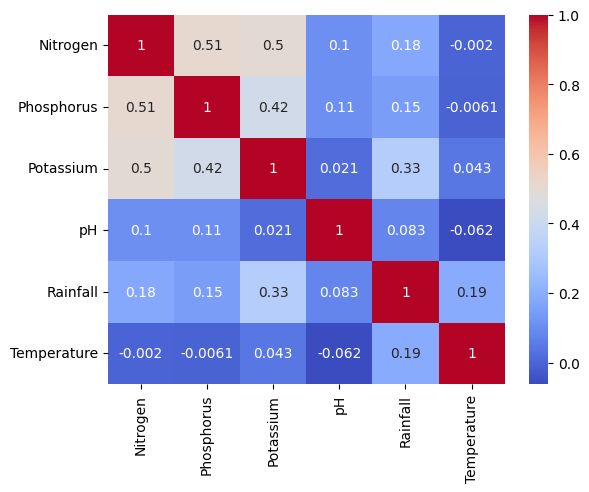

In [46]:
sns.heatmap((data.drop(columns=['Crop', 'Fertilizer', 'District_Name',	'Soil_color'])).corr(), annot=True,cbar=True , cmap='coolwarm')

### Encoding String-type values

In [47]:
encoder1, encoder2 = LabelEncoder(), LabelEncoder()
District = encoder1.fit_transform(data['District_Name'])
Soil = encoder2.fit_transform(data['Soil_color'])

### Mapping Classes to numbers

In [48]:
crops = np.unique(data['Crop'].values)
map_crops = np.transpose([crops, [i for i in range(len(crops))]])
map_crops

array([['Cotton', 0],
       ['Ginger', 1],
       ['Gram', 2],
       ['Grapes', 3],
       ['Groundnut', 4],
       ['Jowar', 5],
       ['Maize', 6],
       ['Masoor', 7],
       ['Moong', 8],
       ['Rice', 9],
       ['Soybean', 10],
       ['Sugarcane', 11],
       ['Tur', 12],
       ['Turmeric', 13],
       ['Urad', 14],
       ['Wheat', 15]], dtype=object)

In [49]:
fertilizers = np.unique(data['Fertilizer'].values)
map_fertilizers = np.transpose([fertilizers, [i for i in range(len(fertilizers))]])
map_fertilizers

array([['10:10:10 NPK', 0],
       ['10:26:26 NPK', 1],
       ['12:32:16 NPK', 2],
       ['13:32:26 NPK', 3],
       ['18:46:00 NPK', 4],
       ['19:19:19 NPK', 5],
       ['20:20:20 NPK', 6],
       ['50:26:26 NPK', 7],
       ['Ammonium Sulphate', 8],
       ['Chilated Micronutrient', 9],
       ['DAP', 10],
       ['Ferrous Sulphate', 11],
       ['Hydrated Lime', 12],
       ['MOP', 13],
       ['Magnesium Sulphate', 14],
       ['SSP', 15],
       ['Sulphur', 16],
       ['Urea', 17],
       ['White Potash', 18]], dtype=object)

### Train-Test Split

In [50]:
X = np.column_stack((District, Soil, data.iloc[:, 2:8].values))
y = data.iloc[:, 8:].values

y_crop = []
for crop in y[:, 0]:
    for i in map_crops:
        if crop == i[0]:
            y_crop.append(i[1])

y_fert = []
for fert in y[:, 1]:
    for i in map_fertilizers:
        if fert == i[0]:
            y_fert.append(i[1])

y_numeric = np.transpose(np.array([y_crop, y_fert]))

X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.25, random_state=42)

PNN(Probailistic Neural Network)

In [51]:
class PNN:
    def __init__(self, sigma=0.1):
        self.sigma = sigma

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.classes = np.unique(y)

    def _kernel(self, x, xi):
        return np.exp(-np.linalg.norm(x - xi) ** 2 / (2 * self.sigma ** 2))

    def predict(self, X):
        y_pred = []
        for x in X:
            probs = []
            for cls in self.classes:
                X_cls = self.X_train[self.y_train == cls]
                kernels = np.array([self._kernel(x, xi) for xi in X_cls])
                prob = np.sum(kernels)
                probs.append(prob)
            y_pred.append(self.classes[np.argmax(probs)])
        return np.array(y_pred)


class CustomMultiOutputPNN:
    def __init__(self, sigma=0.5):
        self.sigma = sigma
        self.models = []

    def fit(self, X, Y):
        self.models = []
        for i in range(Y.shape[1]):  # One model for each output column
            model = PNN(sigma=self.sigma)  # Replace with your PNN class
            model.fit(X, Y[:, i])
            self.models.append(model)

    def predict(self, X):
        preds = []
        for model in self.models:
            pred = model.predict(X)  # Each pred shape: (n_samples,)
            preds.append(pred)
        return np.stack(preds, axis=1)  # Final shape: (n_samples, 2)


Crop PNN

In [52]:
# Train
multi_pnn = CustomMultiOutputPNN(sigma=1)
multi_pnn.fit(X_train, y_train)

# Predict
y_pred_pnn = multi_pnn.predict(X_test)
print(y_pred_pnn.shape)  # ✅ Should now be (1129, 2)

# Now safely compute metrics
from sklearn.metrics import classification_report

print("Crop classification report:")
print(classification_report(y_test[:, 0], y_pred_pnn[:, 0]))

(1129, 2)
Crop classification report:
              precision    recall  f1-score   support

           0       0.45      0.96      0.61       177
           1       0.91      0.75      0.82        28
           2       1.00      0.56      0.71        18
           3       1.00      0.83      0.90        23
           4       0.89      0.64      0.74        50
           5       0.87      0.57      0.69        81
           6       0.97      0.73      0.83        86
           7       1.00      0.80      0.89         5
           8       0.72      0.76      0.74        17
           9       0.83      0.70      0.76        83
          10       0.78      0.78      0.78         9
          11       0.99      0.76      0.86       255
          12       0.74      0.71      0.72        24
          13       1.00      0.73      0.85        15
          14       0.86      0.83      0.84        29
          15       0.97      0.76      0.85       229

    accuracy                           0.7

Fert PNN

In [53]:
print("\nFertilizer classification report:")
print(classification_report(y_test[:, 1], y_pred_pnn[:, 1]))


Fertilizer classification report:
              precision    recall  f1-score   support

           0       0.04      0.90      0.07        10
           1       0.61      0.41      0.49        34
           2       0.64      0.50      0.56        28
           3       0.87      0.59      0.70        22
           4       0.00      0.00      0.00         0
           5       0.78      0.66      0.71       122
           6       1.00      1.00      1.00         3
           7       0.77      0.68      0.72        34
           8       0.50      0.36      0.42        11
           9       0.67      0.54      0.60        26
          10       0.75      0.54      0.63       171
          11       0.88      0.41      0.56        17
          12       0.67      0.40      0.50         5
          13       0.79      0.57      0.66       151
          14       0.61      0.56      0.58        55
          15       0.52      0.42      0.47        95
          16       0.00      0.00      0.00   

In [54]:
# Exact Match Accuracy
exact_match = (y_pred_pnn == y_test).all(axis=1).mean()
print(f"Exact match accuracy: {exact_match * 100:.2f}%")

Exact match accuracy: 54.92%


In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for crop (first column of y_test and y_pred_pnn)
accuracy_pnn_crop = accuracy_score(y_test[:, 0], y_pred_pnn[:, 0])
precision_pnn_crop = precision_score(y_test[:, 0], y_pred_pnn[:, 0], average='weighted')
recall_pnn_crop = recall_score(y_test[:, 0], y_pred_pnn[:, 0], average='weighted')
f1_pnn_crop = f1_score(y_test[:, 0], y_pred_pnn[:, 0], average='weighted')

# Calculate metrics for fertility (second column of y_test and y_pred_pnn)
accuracy_pnn_fert = accuracy_score(y_test[:, 1], y_pred_pnn[:, 1])
precision_pnn_fert = precision_score(y_test[:, 1], y_pred_pnn[:, 1], average='weighted')
recall_pnn_fert = recall_score(y_test[:, 1], y_pred_pnn[:, 1], average='weighted')
f1_pnn_fert = f1_score(y_test[:, 1], y_pred_pnn[:, 1], average='weighted')

# Output the metrics for crop and fertility
print("Crop Classification Metrics for PNN:")
print(f"Accuracy: {accuracy_pnn_crop}")
print(f"Precision: {precision_pnn_crop}")
print(f"Recall: {recall_pnn_crop}")
print(f"F1-Score: {f1_pnn_crop}")

print("\nFertility Classification Metrics For PNN:")
print(f"Accuracy: {accuracy_pnn_fert}")
print(f"Precision: {precision_pnn_fert}")
print(f"Recall: {recall_pnn_fert}")
print(f"F1-Score: {f1_pnn_fert}")


Crop Classification Metrics for PNN:
Accuracy: 0.7661647475642162
Precision: 0.8573078079917883
Recall: 0.7661647475642162
F1-Score: 0.7847218453611292

Fertility Classification Metrics For PNN:
Accuracy: 0.5606731620903455
Precision: 0.7121790303643292
Recall: 0.5606731620903455
F1-Score: 0.6212570588995934


### Sample Prediction

In [57]:
# Example input for prediction
input = ['Solapur', 'Black', 60, 90, 57, 8.2, 850, 22]
input[0] = int(encoder1.transform([input[0]]))
input[1] = int(encoder2.transform([input[1]]))
input = np.array(input).reshape(1, -1)
from sklearn.preprocessing import StandardScaler

# Initialize and fit
scaler = StandardScaler()
scaler.fit(X_train)

# Scale datasets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scale the new input
input_scaled = scaler.transform(input)
pnn_pred = multi_pnn.predict(input_scaled)[0]
pnn_crop = pnn_pred[0]
pnn_fert = pnn_pred[1]
print(f"PNN Prediction: Crop = {map_crops[pnn_crop][0]}, Fertilizer = {map_fertilizers[pnn_fert][0]}")

PNN Prediction: Crop = Cotton, Fertilizer = 10:10:10 NPK
